<h3><center>Naive Bayes / Random Forest</center></h3>

<h5>Grupo: TechMovee</h5>
<h5>Modelo: Naive Bayes  - Random Forest</h5>
<h5>Autor: Melissa Martins de Araujo - 2°G - n°14</h5>

<h4>Importações</h4>

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt
import seaborn as sns

<h4>Lendo a Base</h4>

In [46]:
# Carregando os dados a partir de um arquivo Excel
data = pd.read_excel('C:\\Users\\melissamartins-ieg\\OneDrive - Instituto Germinare\\Interdisciplinar\\AD_MAT3 - Interdisciplinar\\ExpansaoDados\\pesquisa_responsaveis_expandida.xlsx')


<h4>LabelEncoder</h4>

In [47]:
# Inicializando o codificador
label_encoder = LabelEncoder()

# Codificando colunas categóricas
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

#print(data.head())

<h4>Separando em Atributo e Resposta</h4>

In [48]:
# Definindo as variáveis independentes (X) e dependentes (y)
X = data.drop(columns=[
    'Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?'
], axis=1)

y = data['Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?']

<h4>Separando em Treino e Teste</h4>

In [49]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

<h4>Usando Modelo Random Forest</h4>

In [50]:
# Usando Random Forest para identificar a importância das variáveis
model = RandomForestClassifier(random_state=42)
model.fit(X_treino, y_treino)

# Obtendo a importância das variáveis
importances = model.feature_importances_
feature_names = X_treino.columns

# Criando um DataFrame para visualizar a importância das variáveis
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                             Feature  Importance
2  Quanto tempo você leva, em média, para levar s...    0.167544
1      Qual é a distância entre sua casa e a escola?    0.164811
4  Já fez uso do serviço de um transporte escolar...    0.125498
8  Você já teve problemas com horário e comunicaç...    0.122865
0              Qual é a idade do(s) seu(s) filho(s)?    0.117677
3                         Você possui carro próprio?    0.089749
7  Você tem ou já teve dificuldade para encontrar...    0.085954
6  Você estaria disposto a mudar o transporte do ...    0.067807
5     Você já teve problemas com transporte escolar?    0.058094


<h4>Visualizando a importância das variáveis</h4>

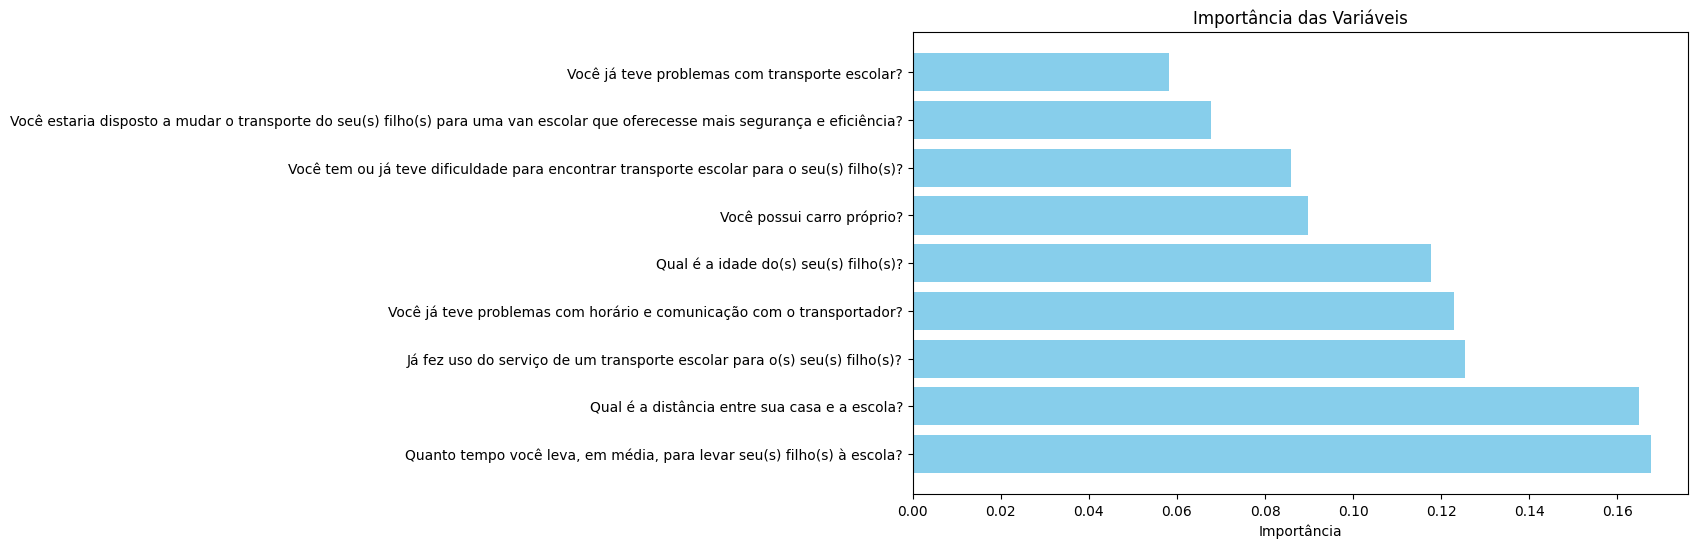

,Qual é a idade do(s) seu(s) filho(s)?,Qual é a distância entre sua casa e a escola?,"Quanto tempo você leva, em média, para levar seu(s) filho(s) à escola?",Você possui carro próprio?,Já fez uso do serviço de um transporte escolar para o(s) seu(s) filho(s)?,Você já teve problemas com transporte escolar?,Você estaria disposto a mudar o transporte do seu(s) filho(s) para uma van escolar que oferecesse mais segurança e eficiência?,Você tem ou já teve dificuldade para encontrar transporte escolar para o seu(s) filho(s)?,Você já teve problemas com horário e comunicação com o transportador?
0,2,3,1,1,0,0,1,0,1
1,2,3,1,1,0,0,0,1,0
2,2,3,2,1,1,1,1,1,0
3,2,3,0,0,0,0,0,1,2
4,1,1,1,1,0,0,0,0,1


In [51]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis')
plt.show()

display(X.head())

<h4>Excluíndo colunas com menos interferência</h4>

In [52]:
X = data.drop(columns=[
    'Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?','Você tem ou já teve dificuldade para encontrar transporte escolar para o seu(s) filho(s)?','Você possui carro próprio?','Qual é a idade do(s) seu(s) filho(s)?'])

In [53]:
# Definindo o ColumnTransformer
preprocessador = ColumnTransformer(
    transformers=[
        ('numericas', StandardScaler(), make_column_selector(dtype_include=['float64', 'int64']))  # Ajuste aqui para suas colunas numéricas
    ],
    remainder='passthrough'
)
X_pre = preprocessador.fit_transform(X) # Aplicando o Label Enconding

# Convertendo a matriz transformada de volta para DataFrame
X = pd.DataFrame(X_pre, columns = X.columns)

<h4><center>Testando o modelo Naive Bayes<center></h4>

<h4>Separando em Treino e Teste</h4>

In [54]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

<h4>SMOTE</h4>

In [55]:
# Aplicando o SMOTE manualmente no conjunto de treino
smote = SMOTE(random_state=42)
X_treino, y_treino = smote.fit_resample(X_treino, y_treino)

<h4>Classificador</h4>

In [56]:
# Inicializando o classificador Naive Bayes
classificador_bayes = GaussianNB()

In [57]:
#Definindo a grade de parâmetros para busca de hiperparâmetros
param_grid = {
     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Realizando a busca em grade
grid_search = GridSearchCV(estimator=classificador_bayes, param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=1)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_treino, y_treino)

# Exibindo os melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

melhor_modelo = grid_search.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


Melhores parâmetros: {'var_smoothing': 1e-09}


In [58]:
# Avaliando o modelo com os melhores parâmetros
#melhor_modelo = grid_search.best_estimator_

# Fazendo previsões no conjunto de teste
predict = melhor_modelo.predict(X_teste)

<h3><center>Métricas</center></h3>

Acurácia: 58.33 %

Precisão: 56.67 %

Recall: 58.62 %

F1-score: 57.63 %



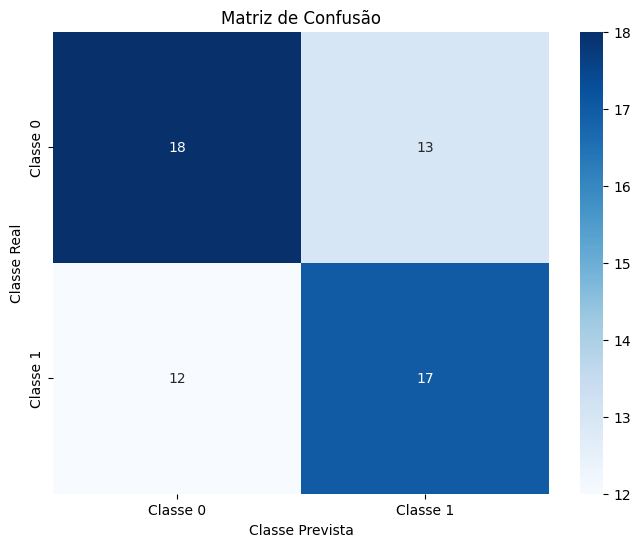

In [59]:
# Avaliando a performance do modelo
acuracia = accuracy_score(y_teste, predict)
precisao = precision_score(y_teste,predict)
recall = recall_score(y_teste,predict)
f1score = f1_score(y_teste,predict)

print(f"Acurácia: {round(acuracia * 100, 2)} %\n")
print(f"Precisão: {round(precisao * 100, 2)} %\n")
print(f"Recall: {round(recall * 100, 2)} %\n")
print(f"F1-score: {round(f1score * 100, 2)} %\n")

#Plotando matriz de confusão
matriz_confusao = confusion_matrix(y_teste, predict)

# Configurando o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Classe {i}' for i in range(matriz_confusao.shape[1])],
            yticklabels=[f'Classe {i}' for i in range(matriz_confusao.shape[0])])

# Adicionando títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()